<a href="https://colab.research.google.com/github/seamusrobertmurphy/verra-tasks1-2/blob/main/verra_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 2:** Prototype Tool for Mapping Wildfires Using the NASA-FIRMS and Earth-Engine API's

## Verra Technology Solutions Job-Inteview-Technical-Exercise

 # Introduction:
 The following script was developed for submission of Task 2 assignment during  employment interview process with Verra Technicial Solutions Team. Task 2 objectives called for development of a digital tool used to assess NASA's Fire Information for Resource Management System (FIRMS) API for available fire alerts.

 Suggested programming languages were cited including Google-Earth-Engine commands written in either JavaScript or Python. This allowed use of the Google Colab environment, preferred for its sharing and notation tools, and the pre-installed earth-engine library and python3 version, as shown in image below.

*   Note, fewer problems are encountered during notebook setup and package installations if run from chrome browser.*


**Figure 1.** Screenshot of local Colab environment

 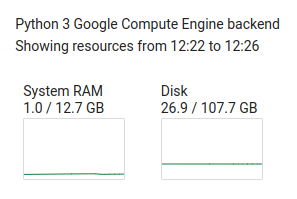


File storage was implemented using the project's public github repository located [here](https://github.com/seamusrobertmurphy/verra-tasks1-2). This respository also stores all data inputs and ouputs from the Task 1 assignment. Since this current notebook was built and hosted on the Colab platform, the repository's version control was instead used in the virtual environment setup of Task 1 tool. Iterations and code edits were committed using Colab-Git widget to enable review of the pipeline's history. Finaly, a mastercopy of this Colab notebook was stored here in its original working directory that is hosted in a personal google drive folder. This was done to allow for quick sharing and secure deploys using the google network.


To help the user navigate the workflow, the following list of summary steps was drawn from the task's outline document and then reinterpreted after several inital attempts in testing the tool:        

1.   Setup GEE environment
2.   Mount user's google drive
3.   Import AOI file of **Spatial Boundary**
4.   Import FIRMS & filter by **Temporal Range**
5.   Map filtered layers over AOI window
6.   Set up **Fire Alerts** showing real-time wildfires
7.   Add option for downloading result rasters



Expect the following code chunk to promt user to authenticate their google-earth-engine account, derive a private token, and paste token into the the in-line box that appears. Follow instructions and links off-page to complete setup.  

In [ ]:
!pip install leafmap geemap geopandas
ee.Authenticate()
ee.Initialize()

import ee, json, geemap, ipyleaflet, os
from google.colab import drive
from google.colab import files
!drive.mount('/content/drive')


# 1.1 Data Sources:

Data was sourced from the earth engine (ee) library and imported as a `FeatureCollection` data object using its ee-assighned label 'FIRMS'. Information regaring the dataset's structure, variable labels, and values are stored here in the [Earth Engine Collection Warehouse](https://developers.google.com/earth-engine/datasets/catalog/FIRMS). Hit the 'citation' tab to reveal variable information.  

This 'FIRMS' comprises the same wildfire data used in the FIRMS digital platform as its passed through API to API to provide estimates of Near-Real-Time locations of active fires that are  captured, processed, and published on a rolling basis every 3 to 5 five hours from moment of observation at satellite. Note that the NRT dataset is derived from MODIS sensor data that is initally captured at a gridded resolution of 250m2 from the Terra and Aqua satellites and then processed, analyzed and redistributed at a resolution of 1km2 by the LANCE data processing house.

In addition to [NRT](https://www.earthdata.nasa.gov/learn/find-data/near-real-time)-FIRMS data, the LANCE workdesk also produces a Ultra-Real-Time [URT-FIRMS](https://www.earthdata.nasa.gov/learn/articles/firms-urt-data) dataset using automated algorithms and satellite connection netowrks to broadcast live streams of processed spectral signatures monitoring is part of the  rolling basis as the Lance . Image processing  processing is derived by passing through  directly from NASA's Lance processing desk throughAPI as
for scanning wildfire fooprints and reqreiving alerts of active fires within defined area of interest (AOI) using Google Earth Engine Collections, leafmap tools, and NASA-FIRMS APIs. Active fire layers NASA-processed indices from VIIRS and MODIS real-time satellites.



# 1.2 Tidy Data

The geospatial data package `geopandas` can be used in importing, reviewing, reprojecting, and assigning coordinate reference systems to user's area-of-interest (AOI) files.

There are three methods for importing data that appeared more user-friendly than others. There is the simple 'drag and drop' method or the use of 'file upload' table in top left, which lands the files into Drive's root directory. From there, the simple file path and file extension can be entered as follows.

Alternatively, we can prompt the user to upload files interactively using the function below that is now commented out as `uploaded = files.upload()`. For this function to work, the user's personal drive must be mounted to the notebook's environment directory by running the command `!drive.mount('/content/drive')` as has been prepared above.  


In [39]:
import geopandas as gpd
aoi_filter_geopanda = gpd.read_file('/content/aoi_filter_small.shp', crs = 'EPSG:4326')
#uploaded = files.upload()

# Convert AOI to ee.Geometry object for clipping
def shp_to_ee_fmt(geodf):
  data = json.loads(geodf.to_json())
  return data['features'][0]['geometry']['coordinates'
  ]
aoi_filter_geometry = ee.Geometry.MultiPolygon(
    shp_to_ee_fmt(aoi_filter_geopanda)
    )

# Convert AOI to ee.Feature object object for styling
aoi_filter_feature = ee.FeatureCollection(
    aoi_filter_geometry
    )
aoi_filter_styled = aoi_filter_feature.style(
    color='#e32636',
    fillColor='80FF0000',
    lineType='solid'
    )

# Clip NASA dataset to AOI window
fires_dataset = ee.ImageCollection(
    'FIRMS').filterDate(
        '2023-10-25', '2023-12-01').select(
            'T21').median()
fires_aoi = fires_dataset.clip(
    aoi_filter_geometry
    )
firesVis = {
    'min': 325.0,
    'max': 400.0,
    'palette': [
        'red', 'orange', 'yellow']
    }

# Map all layers
Map = geemap.Map()
Map.add_basemap('SATELLITE')
Map.centerObject(aoi_filter_geometry, zoom=7)
Map.addLayer(fires_aoi, firesVis, 'Fires')
Map.addLayer(aoi_filter_styled, {}, opacity=.75)
Map

Map(center=[50.64749130996149, -120.24938034062717], controls=(WidgetControl(options=['position', 'transparent…

# ⛔ Fire Alert

There are active fires identified near you.

Review map below of real-time wildfire data.

Sign up here for daily fire alerts in your area: [FIRMS Fire Alerts ](https://firms.modaps.eosdis.nasa.gov/alerts/)


In [37]:
# Filter to real-time FIRMS image
fires_full = ee.ImageCollection('FIRMS')
fires_active = fires_full.first()
# Map again
Map = geemap.Map()
Map.add_basemap('SATELLITE')
Map.centerObject(aoi_filter_geometry, zoom=9)
Map.addLayer(aoi_filter_styled, {}, opacity=.75)
Map.addLayer(fires_active, {}, 'Active Fires:FIRMS')
Map


Map(center=[50.64749130996149, -120.24938034062717], controls=(WidgetControl(options=['position', 'transparent…

Need to download your results in raster format for local mapping?

Replace folder path with personal drive folder and run code.

In [38]:
task = ee.batch.Export.image.toDrive(image=fires_aoi,
                                     scale=30,
                                     fileFormat='GeoTIFF',
                                     description='Wildfires_AOI_2023OctDec',
                                     folder='/content/drive/MyDrive/colab_data/',
                                     maxPixels=1e9)

task.start()